# Robert Klara
# April 5th, 2020
# GEOG 682
# Lab 2

#
# again for reference
# https://www.youtube.com/watch?v=CwFq3YDU6_Y
#
# Helpful Links in code comments
# https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673
# https://packaging.python.org/tutorials/installing-packages/
#
#



In [43]:
import pandas as pd #Imports the pandas library
import numpy as np #Imports the numpy library
import matplotlib  as mpl #Imports the matplotlib
import matplotlib.pyplot as plt #imports pyplot

In [6]:
#https://www.youtube.com/watch?v=AtkWpgJJHgQ
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
#
Crime = pd.read_csv('C:/Users/rklara/Documents/Lab2/Lab2/Crime_2017.csv')

In [11]:
Crime.head(3)

,wkt_geom,CCN,DATE,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,...,NEIGHBORHO,BLOCK_GROU,CENSUS_TRA,VOTING_PRE,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID
0,Point (-77.02498381736047861 38.89981322477427...,17099955,6/12/17,EVENING,OTHERS,THEFT/OTHER,900 - 999 BLOCK OF H STREET NW,397833,136884,2,...,Cluster 8,005800 1,5800.0,Precinct 129,38.899805,-77.024982,DOWNTOWN,2017-06-12T17:07:54.000Z,NaN,205406974
1,Point (-77.07098904595119393 38.90769465590191...,17099960,6/12/17,EVENING,OTHERS,THEFT/OTHER,3600 - 3699 BLOCK OF O STREET NW,393843,137761,2,...,Cluster 4,000202 4,202.0,Precinct 6,38.907687,-77.070987,NaN,2017-06-10T12:00:53.000Z,2017-06-12T14:30:29.000Z,205406975
2,Point (-77.04663978712287076 38.9091032074190295),17099975,6/12/17,EVENING,OTHERS,ROBBERY,1400 - 1499 BLOCK OF 21ST STREET NW,395955,137916,2,...,Cluster 6,005500 4,5500.0,Precinct 14,38.909095,-77.046637,NaN,2017-06-12T16:57:28.000Z,2017-06-12T19:10:37.000Z,205406976


In [13]:
Crimedates= pd.date_range(start='2017-01-01', end='2017-01-31', periods=31)

## Code that calculates thetotal numbrer of crimes committed in January

In [14]:
#need to figure out the imported date types
#https://www.delftstack.com/howto/python-pandas/how-to-convert-dataframe-column-to-datetime-in-pandas
#https://www.youtube.com/watch?v=yCgJGsg0Xa4
Crime.dtypes

wkt_geom       object
CCN             int64
DATE           object
SHIFT          object
METHOD         object
OFFENSE        object
BLOCK          object
XBLOCK          int64
YBLOCK          int64
WARD            int64
ANC            object
DISTRICT      float64
PSA           float64
NEIGHBORHO     object
BLOCK_GROU     object
CENSUS_TRA    float64
VOTING_PRE     object
LATITUDE      float64
LONGITUDE     float64
BID            object
START_DATE     object
END_DATE       object
OBJECTID        int64
dtype: object

In [29]:
#This will index the DATE field from an object to the Datetime type
Crime['DATE'] = pd.to_datetime(Crime.DATE)

In [20]:
#added .head() to this... too many values displayed
Crime.DATE.dt.month.head()

0    6
1    6
2    6
3    6
4    6
Name: DATE, dtype: int64

In [25]:
#ok, lets count the indexed months now
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.value_counts.html

dateindex = pd.Index(Crime.DATE.dt.month)
dateindex.value_counts()

5     3075
1     3018
10    2967
7     2877
6     2863
8     2843
9     2808
4     2682
11    2653
12    2542
2     2417
3     2324
Name: DATE, dtype: int64

##The previous code shows us That there were 3018 crimes in the month of January (Month = 1)##

# The previous code shows us That there were 3018 crimes in the month of January (Month = 1)
## May Had the most crimes at 3075, it sorted it in order...## 


## Code that calculates the total number of crimes in District 3. Use a markup cell to answer the question.

## In the District of Columbia, we use wards. Although it may feel like it at times, this isn't the hunger games (yet)

In [30]:
wardindex = pd.Index(Crime.WARD) #creates the index 
wardindex.value_counts() #counts values in that index

2    5947
6    5509
5    4796
1    4624
7    4309
8    3421
4    2887
3    1576
Name: WARD, dtype: int64

## As you can see, there were approximately 1576 total crime counts in ward number 3 

In [31]:
wardindex #me just putzing around and learning how this is stored. 

Int64Index([2, 2, 2, 4, 2, 1, 2, 5, 2, 2,
            ...
            8, 1, 6, 2, 2, 4, 5, 1, 5, 7],
           dtype='int64', name='WARD', length=33069)

# Code that calculates thetotal number of thefts from autos committed in District 3. Use a Markup cell to show your answer. 

In [33]:
WardOffenseindex = Crime.loc[(Crime['WARD'] == 3) & (Crime['OFFENSE'] == "THEFT F/AUTO")] #this is the selection

In [34]:
WardOffenseindex #ok, thats a pretty rad way to display with the side bars not gonna lie

,wkt_geom,CCN,DATE,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,...,NEIGHBORHO,BLOCK_GROU,CENSUS_TRA,VOTING_PRE,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID
20,Point (-77.06807633016700265 38.93628881787979...,17101100,2017-06-14,DAY,OTHERS,THEFT F/AUTO,3416 - 3499 BLOCK OF ORDWAY STREET NW,394098,140935,3,...,Cluster 15,000600 4,600.0,Precinct 27,38.936281,-77.068074,NaN,2017-06-14T13:33:51.000Z,2017-06-14T13:56:57.000Z,205406994
22,Point (-77.08066726223586329 38.96309845627066...,17101112,2017-06-16,DAY,OTHERS,THEFT F/AUTO,4100 - 4149 BLOCK OF LIVINGSTON STREET NW,393009,143912,3,...,Cluster 11,001100 2,1100.0,Precinct 32,38.963091,-77.080665,NaN,2017-06-14T14:32:02.000Z,2017-06-14T15:20:05.000Z,205406996
77,Point (-77.09062418316827348 38.94438097788134...,17095260,2017-06-05,DAY,OTHERS,THEFT F/AUTO,4218 - 4299 BLOCK OF 46TH STREET NW,392144,141835,3,...,Cluster 11,001001 6,1001.0,Precinct 30,38.944373,-77.090622,NaN,2017-06-05T11:00:41.000Z,2017-06-05T12:10:45.000Z,205407213
175,Point (-77.05434095194166844 38.92337809078466...,17183581,2017-10-22,EVENING,OTHERS,THEFT F/AUTO,2400 - 2798 BLOCK OF CALVERT STREET NW,395288,139501,3,...,Cluster 15,000501 2,501.0,Precinct 26,38.923370,-77.054339,NaN,2017-10-22T12:00:29.000Z,2017-10-22T20:00:29.000Z,205408109
192,Point (-77.08500486009212693 38.95271786069061...,17188321,2017-10-30,DAY,OTHERS,THEFT F/AUTO,4800 - 4899 BLOCK OF 43RD PLACE NW,392632,142760,3,...,Cluster 11,001001 2,1001.0,Precinct 31,38.952710,-77.085003,NaN,2017-10-30T12:05:26.000Z,2017-10-30T12:15:42.000Z,205408126
196,Point (-77.08278724720987896 38.95051242421723...,17188328,2017-10-30,DAY,OTHERS,THEFT F/AUTO,4200 - 4269 BLOCK OF RIVER ROAD NW,392824,142515,3,...,Cluster 11,001001 2,1001.0,Precinct 31,38.950505,-77.082785,NaN,2017-10-30T06:45:12.000Z,2017-10-30T12:05:26.000Z,205408130
276,Point (-77.06307960347149333 38.9334900386949414),17183839,2017-10-23,DAY,OTHERS,THEFT F/AUTO,3030 - 3299 BLOCK OF MACOMB STREET NW,394531,140624,3,...,Cluster 15,000600 2,600.0,Precinct 27,38.933482,-77.063077,NaN,2017-10-22T09:00:48.000Z,2017-10-23T08:15:05.000Z,205408454
487,Point (-77.06325013625975373 38.94370535660278...,17103889,2017-06-18,EVENING,OTHERS,THEFT F/AUTO,4200 - 4225 BLOCK OF CONNECTICUT AVENUE NW,394517,141758,3,...,Cluster 12,001200 4,1200.0,Precinct 33,38.943698,-77.063248,NaN,2017-06-18T11:00:04.000Z,2017-06-18T17:30:44.000Z,205405705
878,Point (-77.08290213796325929 38.96002507658562...,17112897,2017-07-02,EVENING,OTHERS,THEFT F/AUTO,5300 - 5399 BLOCK OF 42ND PLACE NW,392815,143571,3,...,Cluster 11,001100 2,1100.0,Precinct 32,38.960017,-77.082900,NaN,2017-07-02T13:40:41.000Z,2017-07-02T14:40:11.000Z,205406096
910,Point (-77.06343963807623254 38.93629142652424...,17105077,2017-06-20,EVENING,OTHERS,THEFT F/AUTO,3000 - 3379 BLOCK OF ORDWAY STREET NW,394500,140935,3,...,Cluster 15,000600 2,600.0,Precinct 27,38.936284,-77.063437,NaN,2017-06-14T16:00:00.000Z,2017-06-15T08:25:57.000Z,205406128


In [37]:
WardOffenseindex.count()

wkt_geom      503
CCN           503
DATE          503
SHIFT         503
METHOD        503
OFFENSE       503
BLOCK         503
XBLOCK        503
YBLOCK        503
WARD          503
ANC           503
DISTRICT      503
PSA           503
NEIGHBORHO    503
BLOCK_GROU    502
CENSUS_TRA    502
VOTING_PRE    503
LATITUDE      503
LONGITUDE     503
BID             0
START_DATE    503
END_DATE      493
OBJECTID      503
dtype: int64

# 503 auto thefts in district 3. Looking at our data you have a base 0 on censust tracts and block groups, BID idk what that is, same with end dates??? 

# Code that creates a simple plot showing the spatial locationof all thefts from autos committed in District 3.

In [38]:
# hmm this could maybe be useful somehow
# https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6

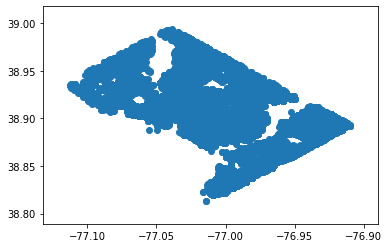

In [44]:
plt.scatter(x=Crime['LONGITUDE'], y=Crime['LATITUDE'])
plt.show()

In [45]:
#ran on the first dataframe, doing this again on multi index datafram

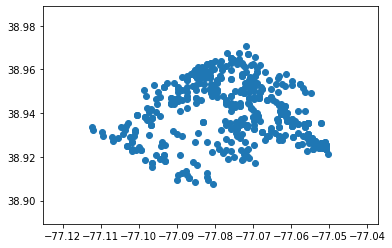

In [46]:
plt.scatter(x=WardOffenseindex['LONGITUDE'], y=WardOffenseindex['LATITUDE'])
plt.show()

# Look at those autothefts